In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).first()
latest_date

('2017-08-23',)

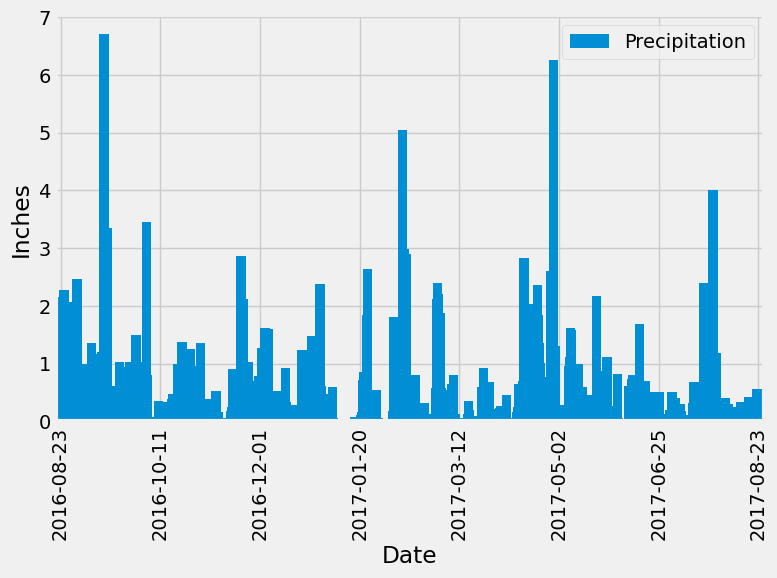

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_latest = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

one_year_records = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= dt.date(2017,8,23) - dt.timedelta(days=365)).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

columns = ['Date','Precipitation']
past_year_df = pd.DataFrame(one_year_records,columns=columns)

# Sort the dataframe by date

past_year_df = past_year_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data

past_year_df.plot(x='Date',y='Precipitation',kind='bar',figsize =(8,6), width=30)

# Setting up the xticks for the bar graph
x_ticks_setup = np.arange(0,len(past_year_df['Date']), len(past_year_df['Date']) // 7)

# Labels set up
plt.xlabel('Date')
plt.ylabel('Inches')

# Adding the xticks and yticks to the graph
plt.xticks(x_ticks_setup)
plt.yticks(np.arange(0,8,1))

# Adding the legend and display the graph
plt.legend(['Precipitation'])
plt.tight_layout()
plt.show()


In [120]:
# Use Pandas to calculate the summary statistics for the precipitation data
past_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [133]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [142]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [145]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stn = 'USC00519281'
temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_stn).all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

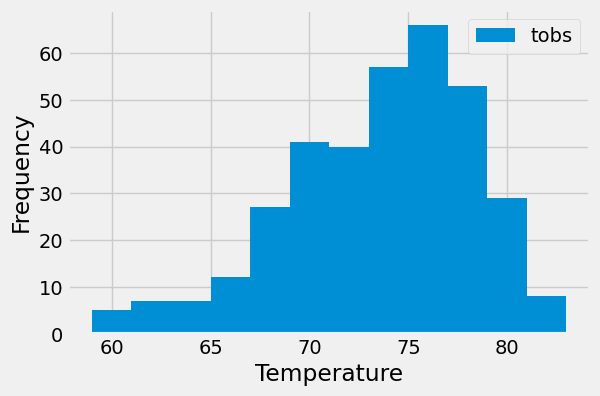

In [167]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stn_past_year_data = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == most_active_stn).filter(Measurement.date >= one_year_from_latest).all()

# Save results to a DataFrame
columns=('Date','Temperature')
most_active_stn_df = pd.DataFrame(stn_past_year_data,columns=columns)

plt.figure(figsize=(6,4))
plt.hist(most_active_stn_df['Temperature'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid
plt.legend(['tobs'])
plt.show()

# Close Session

In [162]:
# Close Session
session.close()